In [2]:

import pandas as pd
import numpy as np
import wfdb
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '../data/physionet.org/files/ptb-xl/1.0.2/'
sampling_rate=100

# Load data

In [4]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [5]:

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))


# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

def aggregate_diagnostic_subclass(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_diagnostic_subclass)


Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,diagnostic_superclass,diagnostic_subclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,False,True,False,False,False,False,False,True,[STTC],[STTC]
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,False,False,False,False,False,False,False,False,[STTC],[ISCA]


In [6]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL',
       'diagnostic_superclass', 'diagnostic_subclass'],
      dtype='object')

In [7]:
Y.diagnostic_superclass

ecg_id
1        [NORM]
2        [NORM]
3        [NORM]
4        [NORM]
5        [NORM]
          ...  
21833    [STTC]
21834    [NORM]
21835    [STTC]
21836    [NORM]
21837    [NORM]
Name: diagnostic_superclass, Length: 21801, dtype: object

The model should predict `diagnostic_superclass`. Let's see how many unique values it has and what they are.


Copy-paste from 2202.00567:

There are five conditions in total, which include Normal ECG (NORM), Myocardial Infarction (MI), ST/T Change (STTC), Conduction Disturbance (CD), and Hyper- trophy (HYP).


In [8]:
super_classes = [x[0] if len(x) > 0 else '' for x in Y['diagnostic_superclass'].values.tolist()]
set(super_classes)

{'', 'CD', 'HYP', 'MI', 'NORM', 'STTC'}

<BarContainer object of 5 artists>

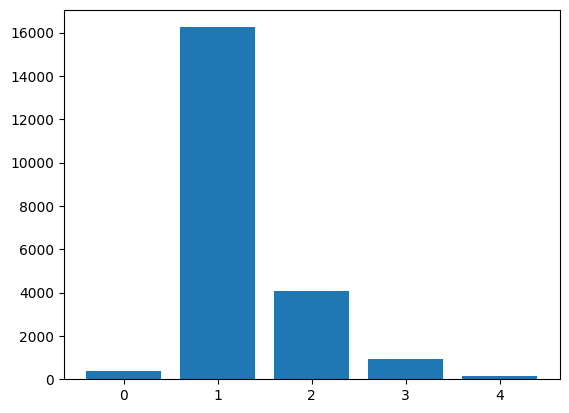

In [9]:
Y['diagnostic_superclass_len'] = Y.diagnostic_superclass.apply(lambda x: len(x))

# let's check how many samples we have for each diagnostic superclass
value_counts = Y['diagnostic_superclass_len'].value_counts()
plt.bar(value_counts.index, value_counts.values)

Majority of the samples have only 1 label, only a few have 0 or 4 labels. Why do some have more than 1 label? From the github page:

```
note: sum of statements exceeds the number of records because of potentially multiple labels per record
```

In [22]:
Y[Y['diagnostic_superclass_len'] > 1][:3]

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,diagnostic_superclass,diagnostic_subclass,diagnostic_superclass_len
ecg_id,,,,,,,,,,,,,,,,,,,,,
39,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-02-16 12:54:01,sinusrhythmus linkstyp qrs(t) abnormal infe...,...,True,False,False,False,False,False,True,"[STTC, MI]","[STTC, NST_, IMI]",2
45,18794.0,51.0,0,NaN,106.0,2.0,0.0,CS-12 E,1985-03-21 15:21:20,sinusrhythmus unvollstÄndiger rechtsschenkelbl...,...,False,False,False,False,False,False,False,"[CD, HYP]","[RVH, RAO/RAE, IRBBB]",2
50,16961.0,59.0,1,NaN,64.0,2.0,0.0,CS-12 E,1985-05-09 12:01:24,sinusrhythmus p-verbreiterung linkstyp t abnor...,...,False,False,False,False,False,False,False,"[CD, MI]","[LMI, IVCD]",2


In [21]:
Y[Y['diagnostic_superclass_len'] > 1].iloc[0]['report']

'sinusrhythmus linkstyp qrs(t) abnormal    inferiorer myokardschaden nicht auszuschliessen qt-verlÄngerung cordichin: 2-1-1 jetzt konstant sinusrhythmus g novodigal 0,2  1x1 tensobon :12,5 mg (chnidinspiegel:3,4(2,0-5,0),digoxinspiegel:0,62(0,5-2) 2x unter'

GPT-4 translation:
```
sinusrhythmus: This is German for "sinus rhythm." A sinus rhythm is a normal rhythm of the heart, where the electrical impulses originate from the sinoatrial (SA) node located in the right atrium.

linkstyp qrs(t) abnormal: This suggests that there's an abnormality in the QRS complex of the electrocardiogram (ECG or EKG) that has a leftward orientation. This could be indicative of several things, including an issue with the left ventricle of the heart.

inferiorer myokardschaden nicht auszuschliessen: This translates to "inferior myocardial damage cannot be excluded." "Inferior" refers to the lower portion of the heart, and "myocardial damage" indicates damage to the heart muscle, potentially from a heart attack.
```

This means that this has sinus rythin, but there is an abnormality in the QRS complex of the electrocardiogram (ECG or EKG) that has a leftward orientation. This could be indicative of several things, including an issue with the left ventricle of the heart. Also, there is a damage to the heart muscle, potentially from a heart attack. 

Is this labelled correctly then? Let's check which classes come together.

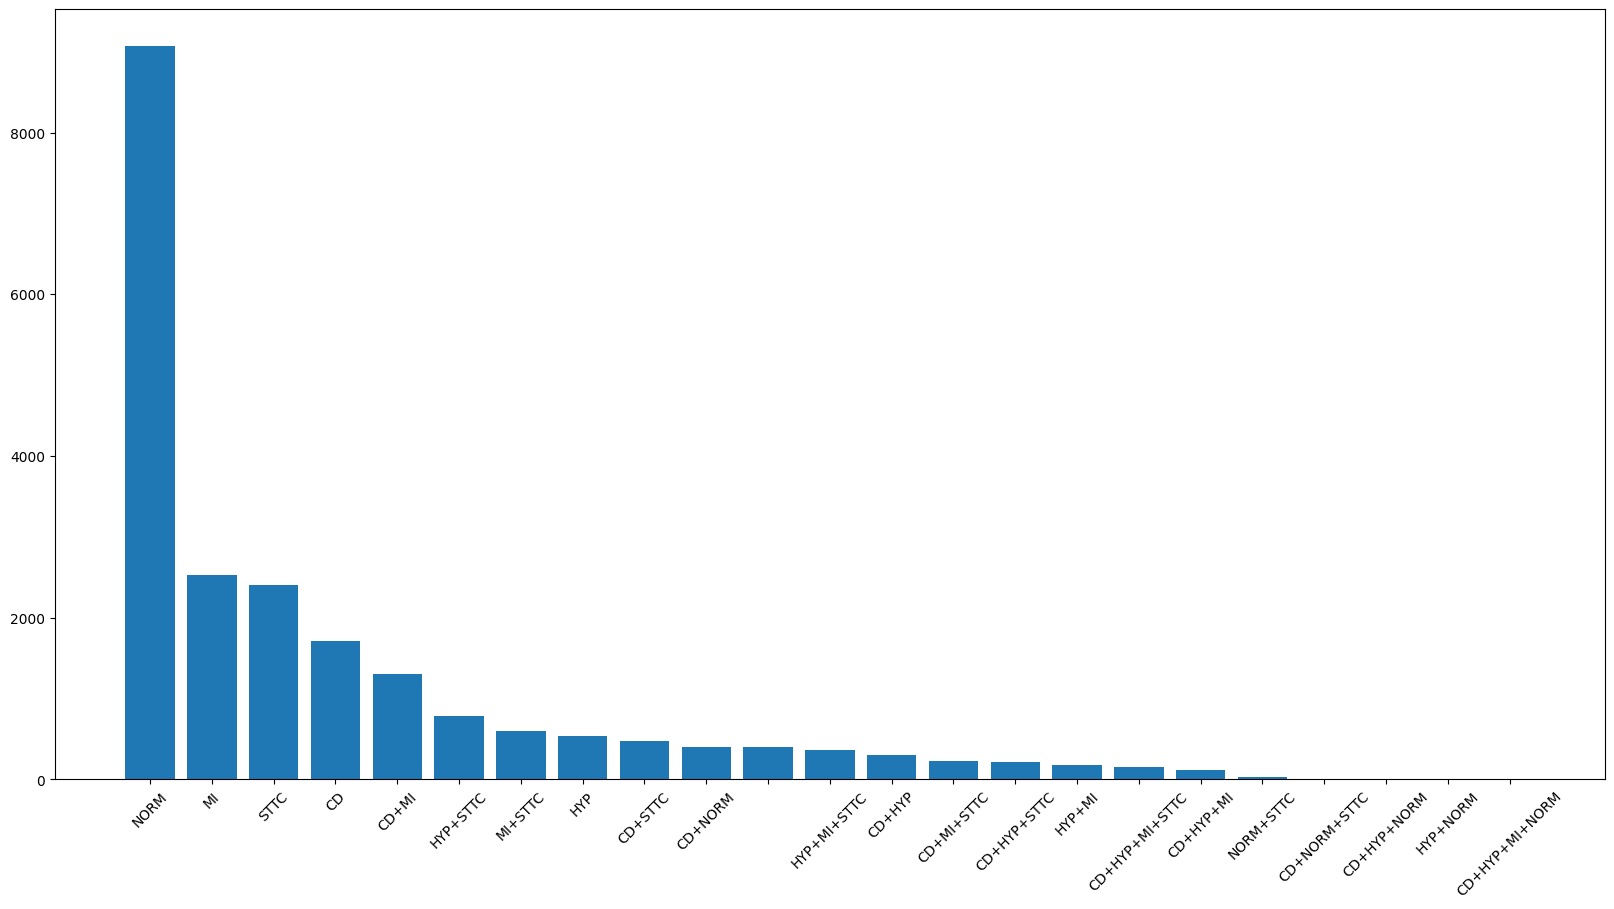

In [31]:
# concat elements in a list in diagnostic_superclass column, with "+" as delimiter
Y['diagnostic_superclass_combined'] = Y['diagnostic_superclass'].apply(lambda x: '+'.join(sorted(x)))

# bar plot of diagnostic_superclass_combined
plt.figure(figsize=(20, 10))

# count the number of each diagnostic_superclass_combined
count = Y['diagnostic_superclass_combined'].value_counts()

# plot the bar plot
plt.bar(count.index, count.values)

# set xticks to 45 degree
plt.xticks(rotation=45);

Wow, there's a huge disbalance in the dataset. Let's check the distribution of each of the superclasses

array([0.34262159, 0.19703352, 0.18853728, 0.17644094, 0.09536667])

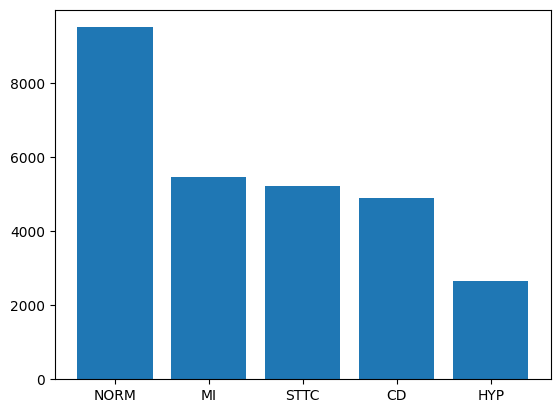

In [37]:
# Flatten the array of classes
all_classes = [item for sublist in Y['diagnostic_superclass'] for item in sublist]

# Count the occurrences of each class
class_counts = pd.Series(all_classes).value_counts()

# Create a bar plot using matplotlib
plt.bar(class_counts.index, class_counts.values)

# print value counts in percentages
pct = class_counts.values / np.sum(class_counts.values)
pct

# X data

In [38]:

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)


In [39]:
X.shape

(21801, 1000, 12)

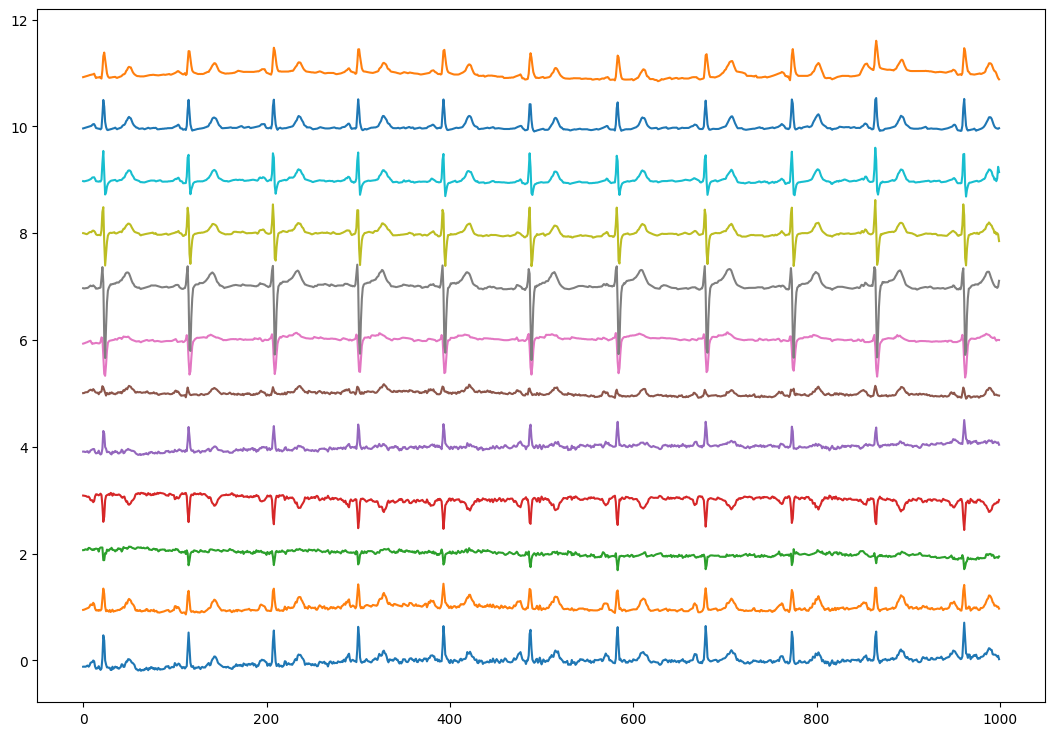

In [60]:
ecg_data = X[0]



fig, ax = plt.subplots(figsize=(13, 9))


# Create a line plot for each feature
for i, feature in enumerate(range(ecg_data.shape[1])):
    plt.plot(ecg_data[:, feature] + i, label=f'Feature {feature + 1}')
    
    

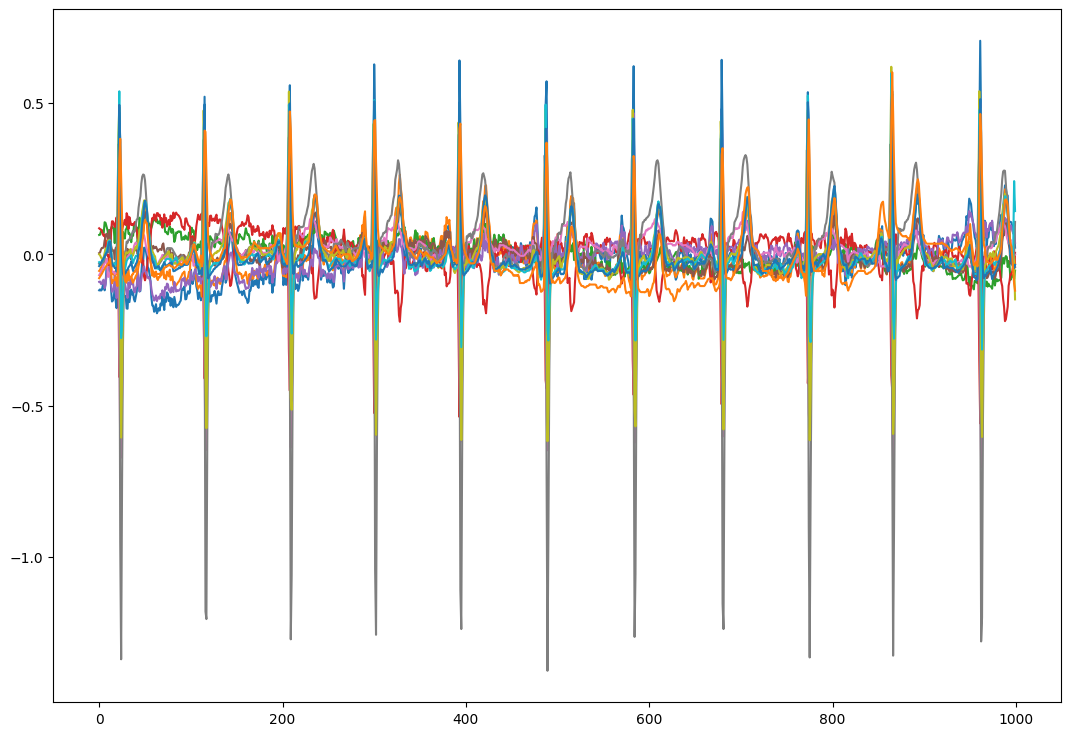

In [63]:
ecg_data = X[0]



fig, ax = plt.subplots(figsize=(13, 9))


# Create a line plot for each feature
for i, feature in enumerate(range(ecg_data.shape[1])):
    plt.plot(ecg_data[:, feature] , label=f'Feature {feature + 1}')
    
    

Hm, interesing, it looks like some features are anti-correlated.

Let's plot it using fancy `ecg_plot`

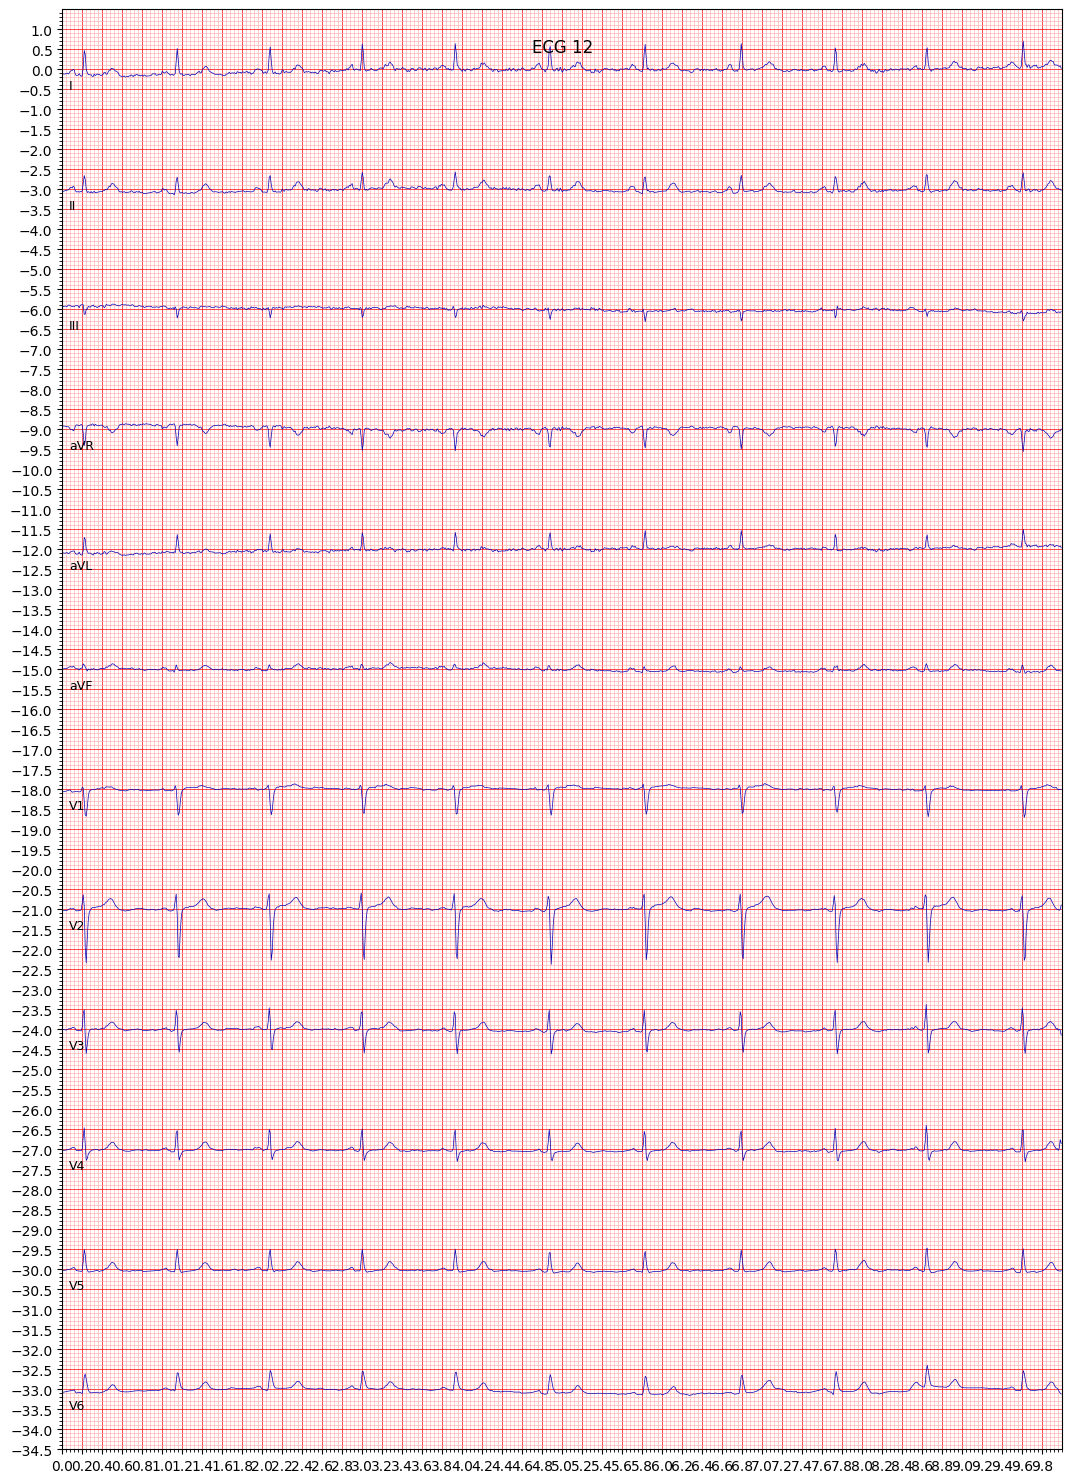

In [50]:
import ecg_plot

ecg = X[0].T
ecg_plot.plot(ecg, sample_rate = 100, title = 'ECG 12', show_separate_line=True, columns=1)
ecg_plot.show()


# Detect heartbeats

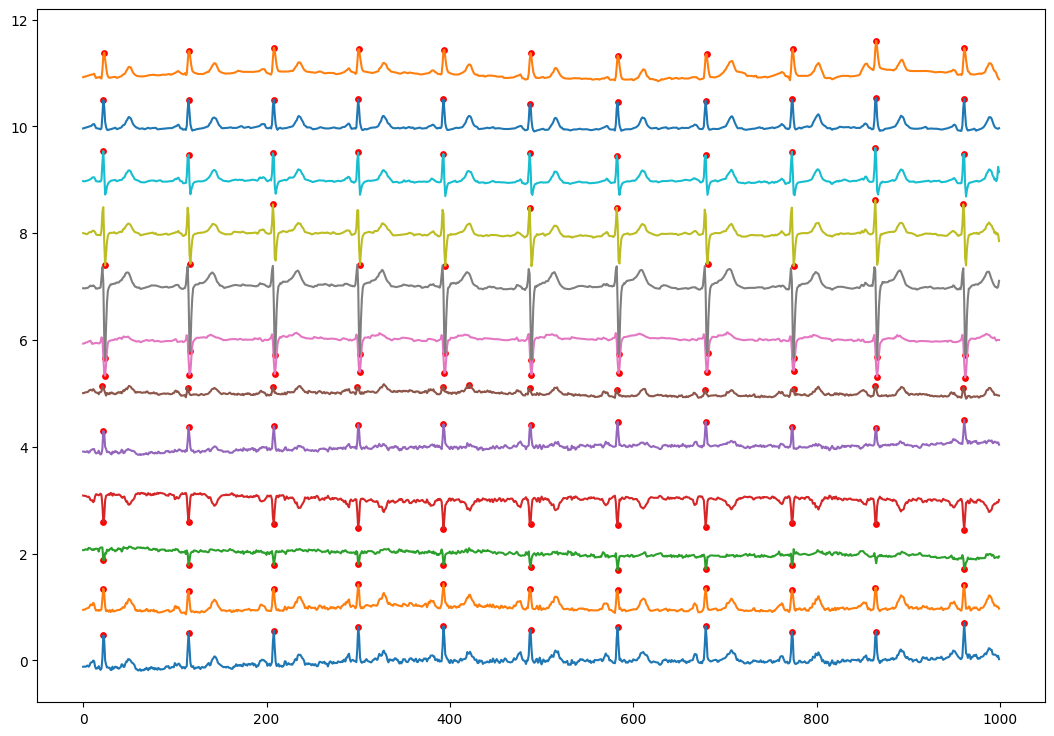

In [71]:
import numpy as np
import ecg_plot
from biosppy.signals import ecg
import matplotlib.pyplot as plt

# Given data
ecg_data = X[0].T
sample_rate = 100

# Plot ECG using ecg_plot
# ecg_plot.plot(ecg_data, sample_rate=sample_rate, title='ECG 12', show_separate_line=True, columns=1)

fig, ax = plt.subplots(figsize=(13, 9))

# Loop through each lead in ecg_data and detect R-peaks
for lead_idx, lead_data in enumerate(ecg_data):
    
    # Detect R-peaks for the current lead
    out = ecg.hamilton_segmenter(signal=lead_data, sampling_rate=sample_rate)
    rpeaks = np.array(out[0])
    
    # Find corresponding y-values for R-peaks for the current lead
    rpeak_values = lead_data[rpeaks]
    
    # Overlay the R-peaks for the current lead on the plot
    plt.scatter(rpeaks, rpeak_values + lead_idx, color='red', s=15, marker='o')
    
    
    plt.plot(lead_data + lead_idx, label=f'Feature {feature + 1}')

ecg_plot.show()


# Misc

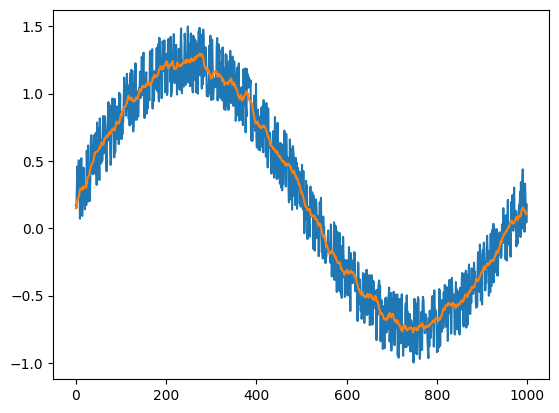

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Sample time series data
x = np.linspace(0, 2 * np.pi, 1000)
x = np.tile(x, (12, 1)).T
data = np.sin(x) + 0.5*np.random.rand(1000, 12)  # Replace with your data

# Define the size of the window
n = 20

# Create the window. For a simple averaging, you can use ones and normalize.
window = np.ones(n) / n

# Apply the filter to each feature
filtered_data = np.apply_along_axis(lambda m: np.convolve(m, window, mode='same'), axis=0, arr=data)


# plot the data 
plt.plot(data[:, 0], label='Original')
plt.plot(filtered_data[:, 0], label='Filtered')